In [204]:
from pyexpat import native_encoding
import pandas 
import numpy as np
import pandas.plotting as plotting
import scipy
import urllib
import os 
import seaborn as sns
import seaborn.objects as so
import matplotlib as plt
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats

# load dataset into python
df = pandas.read_csv( 'who_suicide_statistics.csv')
print(df)

        country  year     sex          age  suicides_no  population
0       Albania  1985  female  15-24 years          NaN    277900.0
1       Albania  1985  female  25-34 years          NaN    246800.0
2       Albania  1985  female  35-54 years          NaN    267500.0
3       Albania  1985  female   5-14 years          NaN    298300.0
4       Albania  1985  female  55-74 years          NaN    138700.0
...         ...   ...     ...          ...          ...         ...
43771  Zimbabwe  1990    male  25-34 years        150.0         NaN
43772  Zimbabwe  1990    male  35-54 years        132.0         NaN
43773  Zimbabwe  1990    male   5-14 years          6.0         NaN
43774  Zimbabwe  1990    male  55-74 years         74.0         NaN
43775  Zimbabwe  1990    male    75+ years         13.0         NaN

[43776 rows x 6 columns]


In [27]:
#Manipulating data
print(df.shape) # 43776 rows and 1 column

(43776, 6)


In [28]:
print(df.columns) # column names are country, year, sex, age, suicides_no, population

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')


In [29]:
print(df['sex']) #printing column names 

0        female
1        female
2        female
3        female
4        female
          ...  
43771      male
43772      male
43773      male
43774      male
43775      male
Name: sex, Length: 43776, dtype: object


In [30]:
#groupby
groupby_sex = df.groupby('sex')
print((groupby_sex,groupby_sex.mean))
groupby_sex.mean()

(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x12cb36b00>, <bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x12cb36b00>>)


,year,suicides_no,population
sex,,,
female,1998.502467,91.631599,1.703216e+06
male,1998.502467,294.999181,1.624966e+06


array([[<AxesSubplot:xlabel='suicides_no', ylabel='suicides_no'>,
        <AxesSubplot:xlabel='population', ylabel='suicides_no'>,
        <AxesSubplot:xlabel='year', ylabel='suicides_no'>],
       [<AxesSubplot:xlabel='suicides_no', ylabel='population'>,
        <AxesSubplot:xlabel='population', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>],
       [<AxesSubplot:xlabel='suicides_no', ylabel='year'>,
        <AxesSubplot:xlabel='population', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>]], dtype=object)

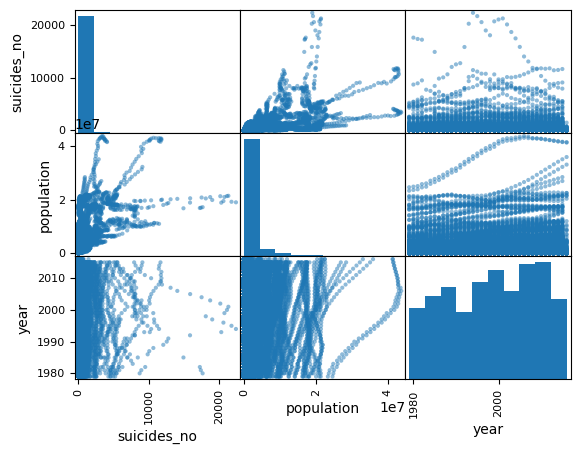

In [34]:
#Plotting data 
plotting.scatter_matrix(df[['suicides_no','population','year']])

In [48]:
#1-sample t-test:
from random import random

rng = np.random.default_rng()
rvs = stats.uniform.rvs(size=50, random_state=rng)
stats.ttest_1samp(rvs, popmean=0.5)
# i dont know how i got 50 and 0.5 i copied the example. idk how to get the numbers from my dataset 

Ttest_1sampResult(statistic=0.8404418964164891, pvalue=0.40474310471265607)

In [76]:
#2-sample t-test:testing for difference across populations
female_suicide_no = df[df['sex'] == 'female']['suicides_no']
male_suicide_no = df[df['sex'] == 'male']['suicides_no']
female_suicide_no = female_suicide_no.fillna(0)
male_suicide_no = male_suicide_no.fillna(0)
stats.ttest_ind(female_suicide_no, male_suicide_no)

Ttest_indResult(statistic=-26.04067116651339, pvalue=2.3267997187068323e-148)

In [77]:
# 3.1.2.2. Paired tests: repeated measurements on the same individuals
stats.ttest_rel(female_suicide_no,male_suicide_no)  

Ttest_relResult(statistic=-35.53976887308776, pvalue=5.1511562167512226e-269)

In [115]:
# 3.1.3 Linear models, multiple factors, and anlysis of variance
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

import statsmodels.api as sm
x = df['suicides_no'].fillna(0).tolist()
y = df['population'].fillna(0).tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                 2.547e+04
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:19:54   Log-Likelihood:            -7.1116e+05
No. Observations:               43776   AIC:                         1.422e+06
Df Residuals:                   43774   BIC:                         1.422e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.644e+05   1.35e+04     71.477      0.000    9.38e+05    9.91e+05
x1          2684.2664     16.821    159.578      0.000    2651.297    2717.236
==============================================================================
Omnibus:                    35644.199   Durbin-Watson:                   0.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2725600.814
Skew:                           3.418   Prob(JB):                         0.00
Kurtosis:                      41.047   Cond. No.                         824.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
#Categorical Variables 
df = pandas.read_csv('who_suicide_statistics.csv')
model = ols("suicides_no ~ sex + 1", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            suicides_no   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     680.8
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          7.28e-149
Time:                        23:23:17   Log-Likelihood:            -3.3615e+05
No. Observations:               41520   AIC:                         6.723e+05
Df Residuals:                   41518   BIC:                         6.723e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      91.6316      5.512     16.626      0.000      80.829     102.434
sex[T.male]   203.3676      7.794     26.091      0.000     188.090     218.645
==============================================================================
Omnibus:                    69766.470   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         67755547.195
Skew:                          11.513   Prob(JB):                         0.00
Kurtosis:                     199.558   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
# Link to t-test between different sex
df_female_suicide_no = pandas.DataFrame({'sex' : female_suicide_no, 'type' : 'female'})
df_male_suicide_no = pandas.DataFrame({'sex' : male_suicide_no, 'type' : 'male'})
data_long = pandas.concat((df_female_suicide_no, df_male_suicide_no))
model = ols("sex ~ type", data_long).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sex   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     678.1
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          2.33e-148
Time:                        23:31:40   Log-Likelihood:            -3.5334e+05
No. Observations:               43776   AIC:                         7.067e+05
Df Residuals:                   43774   BIC:                         7.067e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       86.9094      5.238     16.593      0.000      76.643      97.175
type[T.male]   192.8870      7.407     26.041      0.000     178.369     207.405
==============================================================================
Omnibus:                    74523.256   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         78935215.085
Skew:                          11.807   Prob(JB):                         0.00
Kurtosis:                     209.684   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
stats.ttest_ind(female_suicide_no, male_suicide_no)

Ttest_indResult(statistic=-26.04067116651339, pvalue=2.3267997187068323e-148)

In [149]:
#Multiple Regression
df = pandas.read_csv( 'who_suicide_statistics.csv')
model = ols('population ~ country + suicides_no', df).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1344.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:45:55   Log-Likelihood:            -5.6607e+05
No. Observations:               36060   AIC:                         1.132e+06
Df Residuals:                   35941   BIC:                         1.133e+06
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [175]:
armenia = df[df["country"] == "Armenia"]["population"]
bahamas = df[df["country"] == "Bahamas"]["population"]
stats.f_oneway(armenia, bahamas)

F_onewayResult(statistic=1372.448629559131, pvalue=6.129713962196553e-173)

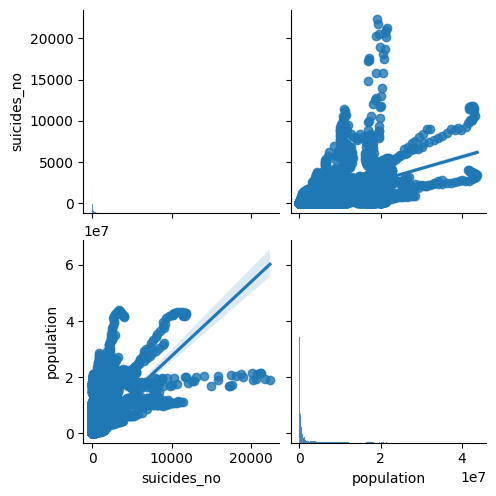

In [196]:
#Seaborn for statistical exploration 
sns.pairplot(df, vars=['suicides_no','population'],kind='reg')


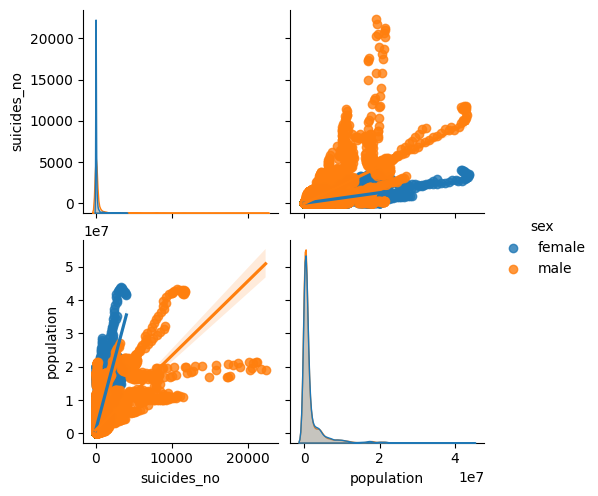

In [197]:
sns.pairplot(df, vars=['suicides_no','population'],kind='reg',hue='sex')


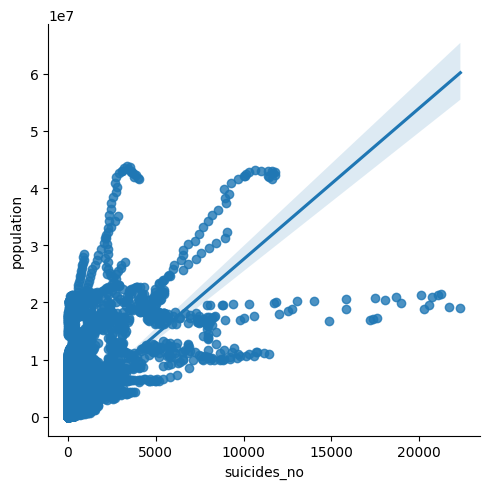

In [199]:
sns.lmplot(y='population', x='suicides_no', data=df) 

In [209]:
result = ols(formula='suicides_no ~ population + sex + population * sex',data=df).fit()
print(result.summary())     

                            OLS Regression Results                            
Dep. Variable:            suicides_no   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                 1.277e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:43:50   Log-Likelihood:            -2.8158e+05
No. Observations:               36060   AIC:                         5.632e+05
Df Residuals:                   36056   BIC:                         5.632e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -6